# Exercise Sheet 2: Head Modeling

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import constants
import bci_minitoolbox as bci


## Task 1: T1-MRI scan (2 points)
In Magnetic Resonance Imaging (MRI), a T1-scan is often used as a structural scan of the anatomy. This can be used to extract the individual geometry of the head of a subject. T1 is a certain longitudinal relaxation time of the nuclear spin of atoms and is dependent on the individual binding of the atoms and the aggregation state of the matter. Measuring the remaining resonance after a certain time can lead to insights on the composition of the matter under study.
The result is a spatially resololved intensity value that can be treated like any other 3-dimensional gray-scale image.

The file T1.npy contains the T1-scan of a human subject's head. In this image, the first dimension represents the direction from left to right pre-auricular point (a certain point above the ear channel on the ear conch). This direction is also called lateral. The second dimension is defined by the direction from the center between the two pre-auricular points (called the intra-auricular point) to the nasal point (on the nose between the eyes). This dimension is also called frontal. The third and last dimension is perpendicular to the other two dimensions oriented towards the top of the head. It's called the superior direction.

**Tasks:**

a) Use the command *imshow* from the Matplotlib to plot 3 images in each mid-plane slice of the MRI.

b) Plot a histogram over the intensity values (function *hist*) in a linear and a logarithmic scale for the frequency.

What can you say about the intensity values of different tissue types? Are they well separated?

Text(0.5, 0.98, 'MRI of a head in all center axis')

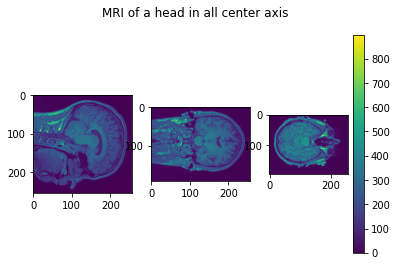

In [2]:
mri=np.load('T1.npy');

mean_axis = np.array(mri.shape) // 2

plt.subplot(1, 3, 1)
plt.imshow(mri[mean_axis[0], :, :])
plt.subplot(1, 3, 2)
plt.imshow(mri[:, mean_axis[1], :])
plt.subplot(1, 3, 3)
plt.imshow(mri[:, :, mean_axis[2]])
plt.colorbar()

plt.suptitle("MRI of a head in all center axis")

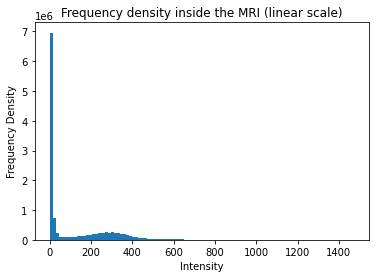

In [3]:
plt.hist(mri.flatten(), bins=100)
plt.title("Frequency density inside the MRI (linear scale)")
plt.xlabel("Intensity")
plt.ylabel("Frequency Density");

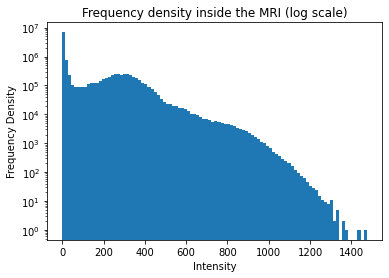

In [4]:
plt.hist(mri.flatten(), bins=100, log=True);
plt.title("Frequency density inside the MRI (log scale)")
plt.xlabel("Intensity")
plt.ylabel("Frequency Density");

"What can you say about the intensity values of different tissue types? Are they well separated?"

We find in the log-plot that the different tissue types almost can be distinguished as frequency density peaks at different intensities.The initial "peak" at very low frequency density can be assumed to be noise, but there is at least one very clear peak at around intensity 300. After that, it would require more careful analysis to see if there is any more statistically sound peak - but one could further investigate the intensities 300, 600, 850. 


## Task 2: Tissue masks  (2 points)
Correct segmentation is a non-trivial task, which a lot of scientific literature can be found on. There are automatic and semi-automatic routines, but many times  aditional manual error-correction is done if precise segmentations are needed. Here we want to look at the results of on an automatic routine developed in [Huang, Y., Dmochowski, J.P., Su, Y. and Datta, A. (2013), 'Automated mri segmentation for individualized modeling of current flow in the human head', Journal of Neural Engineering, 10(6):066004].

The tissue masks extracted by this algorithm have been based upon the SPM-toolbox (http://www.fil.ion.ucl.ac.uk/spm/) and the new_segement algorithm therein. The algorithm uses a tissue probability map (TPM) extended to the neck, where local probabilities of tissue occurrence are additionally used as priors for the extraction. The MRI is first matched to the TPM by a non-linear deformation (=warp) and then the local intensities are evaluated based on their intensity value and the additional information of local tissue probability.

**Tasks:**

Load the files for the 6 different tissue types (air,CSF,gray matter,white matter, scalp, skull) and display them all in a medial sagittal cut (the medium vertical plane from the side of the head) with *imshow*.

In [5]:
air=np.load('air.npy')
csf=np.load('csf.npy')
gray=np.load('gray.npy')
scalp=np.load('scalp.npy')
skull=np.load('skull.npy')
white=np.load('white.npy')

assert air.shape == csf.shape == gray.shape == scalp.shape == skull.shape == white.shape

mean_axis_maps = np.array(air.shape) // 2



# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Air")
plt.imshow(air[mean_axis_maps[0], :, :])
plt.subplot(2, 3, 2)
plt.title("CSF")
plt.imshow(csf[mean_axis_maps[0], :, :])
plt.subplot(2, 3, 3)
plt.title("Gray")
plt.imshow(gray[mean_axis_maps[0], :, :])
plt.subplot(2, 3, 4)
plt.title("Scalp")
plt.imshow(scalp[mean_axis_maps[0], :, :])
plt.subplot(2, 3, 5)
plt.title("Skull")
plt.imshow(skull[mean_axis_maps[0], :, :])
plt.subplot(2, 3, 6)
plt.title("White")
plt.imshow(white[mean_axis_maps[0], :, :])

## Task 3: T1 intensities by tissue class  (3 points)
As we now have the spatial distribution of differen tissue types, we can check how the different T1-intensity values are distributed within each type. 

**Tasks:**

Therefore, plot histograms (*np.histogram*) that only consist of those parts of the MRI that belong to a certain tissue type by using the masks from exercise 2. Also, plot a histogram of all 6 tissue types at once (this is different than the histograms from task 1, because the air outside the head has been removed from the segmentations). Plot all histograms into one plot. Be careful about the number of voxels per class: Normalize the output to be comparable.

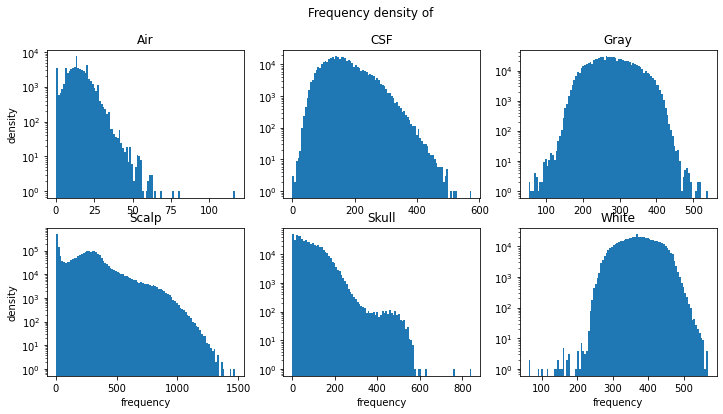

In [6]:
def plot_historgram_with_mask(mask, title, x_l=False, y_l=False):
    plt.hist(mri[mask].flatten(), bins=100, log=True);
    plt.title(title)
    if x_l:
        plt.xlabel("frequency")
    if y_l:
        plt.ylabel("density");
    
plt.figure(figsize=(12, 6))
plt.suptitle("Frequency density of")
plt.subplot(2, 3, 1)
plot_historgram_with_mask(air, "Air", False, True)
plt.subplot(2, 3, 2)
plot_historgram_with_mask(csf, "CSF")
plt.subplot(2, 3, 3)
plot_historgram_with_mask(gray, "Gray")
plt.subplot(2, 3, 4)
plot_historgram_with_mask(scalp, "Scalp", True, True)
plt.subplot(2, 3, 5)
plot_historgram_with_mask(skull, "Skull", True)
plt.subplot(2, 3, 6)
plot_historgram_with_mask(white, "White", True)

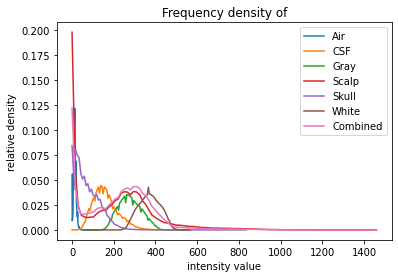

In [7]:
def plot_historgram_with_mask_combined(mask, label):
    hist, bins = np.histogram(mri[mask].flatten(), bins=100)
    plt.plot(bins[:-1], hist / mask.sum(), label=label, )
    plt.xlabel("intensity value")
    plt.ylabel("relative density")
    
plt.title("Frequency density of")
plot_historgram_with_mask_combined(air, "Air")
plot_historgram_with_mask_combined(csf, "CSF")
plot_historgram_with_mask_combined(gray, "Gray")
plot_historgram_with_mask_combined(scalp, "Scalp")
plot_historgram_with_mask_combined(skull, "Skull")
plot_historgram_with_mask_combined(white, "White")
plot_historgram_with_mask_combined(air | csf | gray | scalp | skull | white, "Combined")
plt.legend();

## Task 4: 4-shell 3D-mesh of a human head  (2 points)
From these segmented MRIs, different geometrical representations can be extracted for further numerical head modeling. For Finite Element Method (FEM) head modeling, using the voxels of the MRI as the single discrete finite elements would be the next step. We will in contrast focus on the Boundary Element Method (BEM) for head modeling. For BEM head models a representation of the boundaries between different subdomains is needed. This is mostly done in a triangular fashion, where every surface is represented by a set of vertexes (points) and the triangles connecting them.

The extraction of the meshes was in our case done by the *project_mesh* algorithm of the fieldtrip tolbox (http://fieldtriptoolbox.org/), which starts with a uniform polygon for each tissue type and projects every vertex of it to the outermost position still within the specific tissue type. The results for 4-shells with tissue types brain, CSF, skull and scalp are saved in positions of vertices in 3 dimensions (pos1-pos4) and the indices of the individual vertices connected by triangles (tri1-tri4). The variable names are sorted from inside of the brain (pos1/tri1) to the scalp (pos4/tri4) and the origin is located at the intra-auricular point within the brain (center between both ears).

**Tasks:**

Use the *ax.plot_trisurf(X, Y, triangles=tri, ...)* function to plot the 4 shells into one 3-dimensional figure (*ax = fig.add_subplot(111, projection='3d'*) in different colors. Set the alpha level (the transparency) of each shell accordingly to be able to see the inner shells from outside.

In [8]:
import matplotlib.colors as colors

pos1=np.load('bnd4_pos1.npy')
tri1=np.load('bnd4_tri1.npy')
pos2=np.load('bnd4_pos2.npy')
tri2=np.load('bnd4_tri2.npy')
pos3=np.load('bnd4_pos3.npy')
tri3=np.load('bnd4_tri3.npy')
pos4=np.load('bnd4_pos4.npy')
tri4=np.load('bnd4_tri4.npy')

figure = plt.figure()
ax: Axes3D = figure.add_subplot(111, projection='3d')
ax.plot_trisurf(pos1[:, 0], pos1[:, 1], pos1[:, 2], triangles=tri1, color=colors.to_rgba('blue', alpha=0.3))
ax.plot_trisurf(pos2[:, 0], pos2[:, 1], pos3[:, 2], triangles=tri2, color=colors.to_rgba('green', alpha=0.3))
ax.plot_trisurf(pos3[:, 0], pos3[:, 1], pos3[:, 2], triangles=tri3, color=colors.to_rgba('red', alpha=0.3))
ax.plot_trisurf(pos4[:, 0], pos4[:, 1], pos4[:, 2], triangles=tri4, color=colors.to_rgba('gray', alpha=0.3))

## Task 5: EEG leadfield: electrode potential  of a source (2 points)

Those of you who attended the BCI-IL course in the winter term might remember the bci_minitoolbox with it's function *scalpmap*. We used this function to plot event-related potentials (ERPs) measured by EEG on a 2-dimensional scalp, which is a standard procedure in EEG analysis. Also, we plotted spatial patterns and filters with it.

The file 'em2dsm.npy' contains the leadfield for the head above. This is what most headmodels in the end look like for an EEG researcher. The leadfield describes the potential on the scalp for every single modeled source within the brain. 

The leadfield $L$ from 'em2dsm.npy' has the dimensions (NoElec x NoSource x 3). Select an arbitrary dipole (aka source) and build the inner product of the result with an arbitrary dipolar moment $p$ of your choice:

$v=L_i \cdot p$. 

Now, we can use the *scalpmap* function to plot a simulated scalp potential from a neuronal source of the head modeling approach.

Also, we will need the montage *mnt*, which sets the position for each channel. Additionally you can find the channel labels *clab* to look at the corresponding channel names (not needed to solve the task).

**Tasks:**

Plot the scalp potential for a dipole of your choice from the leadfield using bci.scalpmap(mnt, $v$, clim=(-*maxamp*,*maxamp*), cb_label=*labelstring*) from the bci_minitoolbox library that was used in the BCI-IL in winter term (provided on course page).

In [9]:
em2dsm=np.load('em2dsm.npy')
mnt=np.load('mnt.npy')
clab=np.load('clab.npy',allow_pickle=True)

dipole = np.array([1, 0, 0])
source = 100
v = em2dsm[:, source, :] @ dipole

plt.figure()
bci.scalpmap(mnt, v, clim='sym', cb_label="Activation using Leadfield")
plt.show()

## Task 6: The scalp potential (4 points)
In the file 'head2dsm.npy' you can find a similar file as in task 6 but this time not mapping to the electrode locations but to the vertices of the scalp surface, which is the poistion of the modeled scalp potentials.

**Tasks:**

a) Chose the same dipole and dipolar moment as in task 6 and simulate the scalp potential using the file 'head2dsm.npy'.

b) Plot the distribution of the potential on the brain surface using the *plot_trisurf* function from task 5 in combination with indiviudally colored triangles. The key function to this is the method *.set_facecolors(colors)* of the object returned by plot_trisurf, where colors is of shape (NoTri,3) or (NoTri,4) depending on the colormap and the RGB definition the colormap uses. 

*Hint: See here how to translate scalar values to RGB colormaps: https://matplotlib.org/api/cm_api.html. As the potential is defined point-wise, for plotting the color of each triangle you can use the average of the 3 surrounding points for each triangle, which are indexed in tri. An example for the use of colomaps is also given below.*


In [10]:
#a)
%matplotlib notebook
pos4=np.load('bnd4_pos4.npy')
tri4=np.load('bnd4_tri4.npy')
head2dsm=np.load('head2dsm.npy')
phis = head2dsm[:, source, :] @ dipole

avg_phis = np.mean(phis[tri4], axis=1)

#b)

#This is an example of how to build a colormap:
absmax = np.max(np.abs(avg_phis))
mappy = plt.cm.ScalarMappable(cmap=plt.cm.jet)
mappy.set_clim([np.min(avg_phis), np.max(avg_phis)])
mappy.set_array([])

#This is an example of how to set the colors and use plot_trisurf with it
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(111, projection='3d')
trisufplt = ax.plot_trisurf(pos1[:, 0], pos1[:, 1], pos1[:, 2], triangles=tri1)
trisufplt.set_facecolors(mappy.to_rgba(avg_phis))
fig.colorbar(mappy, ax=ax, label='Scalp Potential')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


1922
Min: -35.60032929929424 Max: 48.970749263964755


<IPython.core.display.Javascript object>